In [124]:
%matplotlib notebook
import pandas as pd
import os
import glob
import matplotlib.pyplot as plot

In [125]:
# source: ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/
# Data for 2017, North and South by Month
paths = ['../data/North_2017/', '../data/South_2017/']
#print(glob.glob(os.path.join(paths[0], '*.csv')))
all_files = (glob.glob(os.path.join(p, '*.csv')) for p in paths)

df_from_each_file = (pd.read_csv(f) for files in all_files for f in files)

concatenated_df   = pd.concat(df_from_each_file, ignore_index=True)
concatenated_df.head(10)

,year,mo,data_type,region,extent,area
0,1979,1,Goddard,N,15.60,12.36
1,1980,1,Goddard,N,15.05,11.88
2,1981,1,Goddard,N,15.11,11.85
3,1982,1,Goddard,N,15.34,12.13
4,1983,1,Goddard,N,15.16,11.94
5,1984,1,Goddard,N,14.69,11.62
6,1985,1,Goddard,N,14.96,11.64
7,1986,1,Goddard,N,15.12,11.82
8,1987,1,Goddard,N,15.28,11.84
9,1988,1,-9999,N,-9999.00,-9999.00


In [126]:
len(concatenated_df.index) # getting number of rows

922

In [127]:
list(concatenated_df)

['year', ' mo', '    data_type', ' region', ' extent', '   area']

In [128]:
def correct_month(month):
    if(month < 10):
        return '0' + str(month)
    else:
        return str(month)
concatenated_df['date'] = concatenated_df[' mo'].apply(correct_month) + '-' + concatenated_df['year'].apply(str)
concatenated_df['date'] = pd.to_datetime(concatenated_df['date'], format='%m-%Y')
concatenated_df = concatenated_df[['    data_type', ' region',' extent', '   area', 'date']]

In [129]:
concatenated_df.head()

,data_type,region,extent,area,date
0,Goddard,N,15.60,12.36,1979-01-01
1,Goddard,N,15.05,11.88,1980-01-01
2,Goddard,N,15.11,11.85,1981-01-01
3,Goddard,N,15.34,12.13,1982-01-01
4,Goddard,N,15.16,11.94,1983-01-01


In [130]:
concatenated_df['    data_type'].unique()

array(['      Goddard', '        -9999', '      NRTSI-G'], dtype=object)

In [131]:
concatenated_df = concatenated_df[concatenated_df['    data_type'] != '        -9999']
concatenated_df.head()

,data_type,region,extent,area,date
0,Goddard,N,15.60,12.36,1979-01-01
1,Goddard,N,15.05,11.88,1980-01-01
2,Goddard,N,15.11,11.85,1981-01-01
3,Goddard,N,15.34,12.13,1982-01-01
4,Goddard,N,15.16,11.94,1983-01-01


In [132]:
concatenated_df.set_index(['date'],inplace=True)

In [144]:
group_region_year_sorted = concatenated_df[[' region', ' extent', '   area']].groupby([' region',concatenated_df.index.year]).mean().apply(lambda x: x.sort_values(ascending=False))
group_region_year_sorted.head()

extent      area
 region                          
      N 1978  13.095000  9.920000
        1979  12.576667  9.381667
        1980  12.555000  9.326667
        1981  12.358333  9.085833
        1982  12.722500  9.469167

In [145]:
group_region_year_sorted.transpose().head()

region       N                                                         \
           1978       1979       1980       1981       1982       1983   
 extent  13.095  12.576667  12.555000  12.358333  12.722500  12.542500   
   area   9.920   9.381667   9.326667   9.085833   9.469167   9.366667   

 region                                              ...             S  \
              1984     1985       1986       1987    ...          2008   
 extent  12.140000  12.2650  12.455833  12.391818    ...     12.625000   
   area   8.949167   9.0425   9.237500   9.444545    ...      9.201667   

 region                                                                    \
              2009       2010       2011       2012       2013       2014   
 extent  12.435000  12.453333  11.907500  12.444167  12.905833  13.142500   
   area   9.076667   9.040000   8.610833   9.125833   9.581667   9.746667   

 region                                
            2015       2016      2017  
 extent  12.8025  11.578333  3.103333  
   area   9.3075   8.230000  1.943333  

[2 rows x 80 columns]

<IPython.core.display.Javascript object>


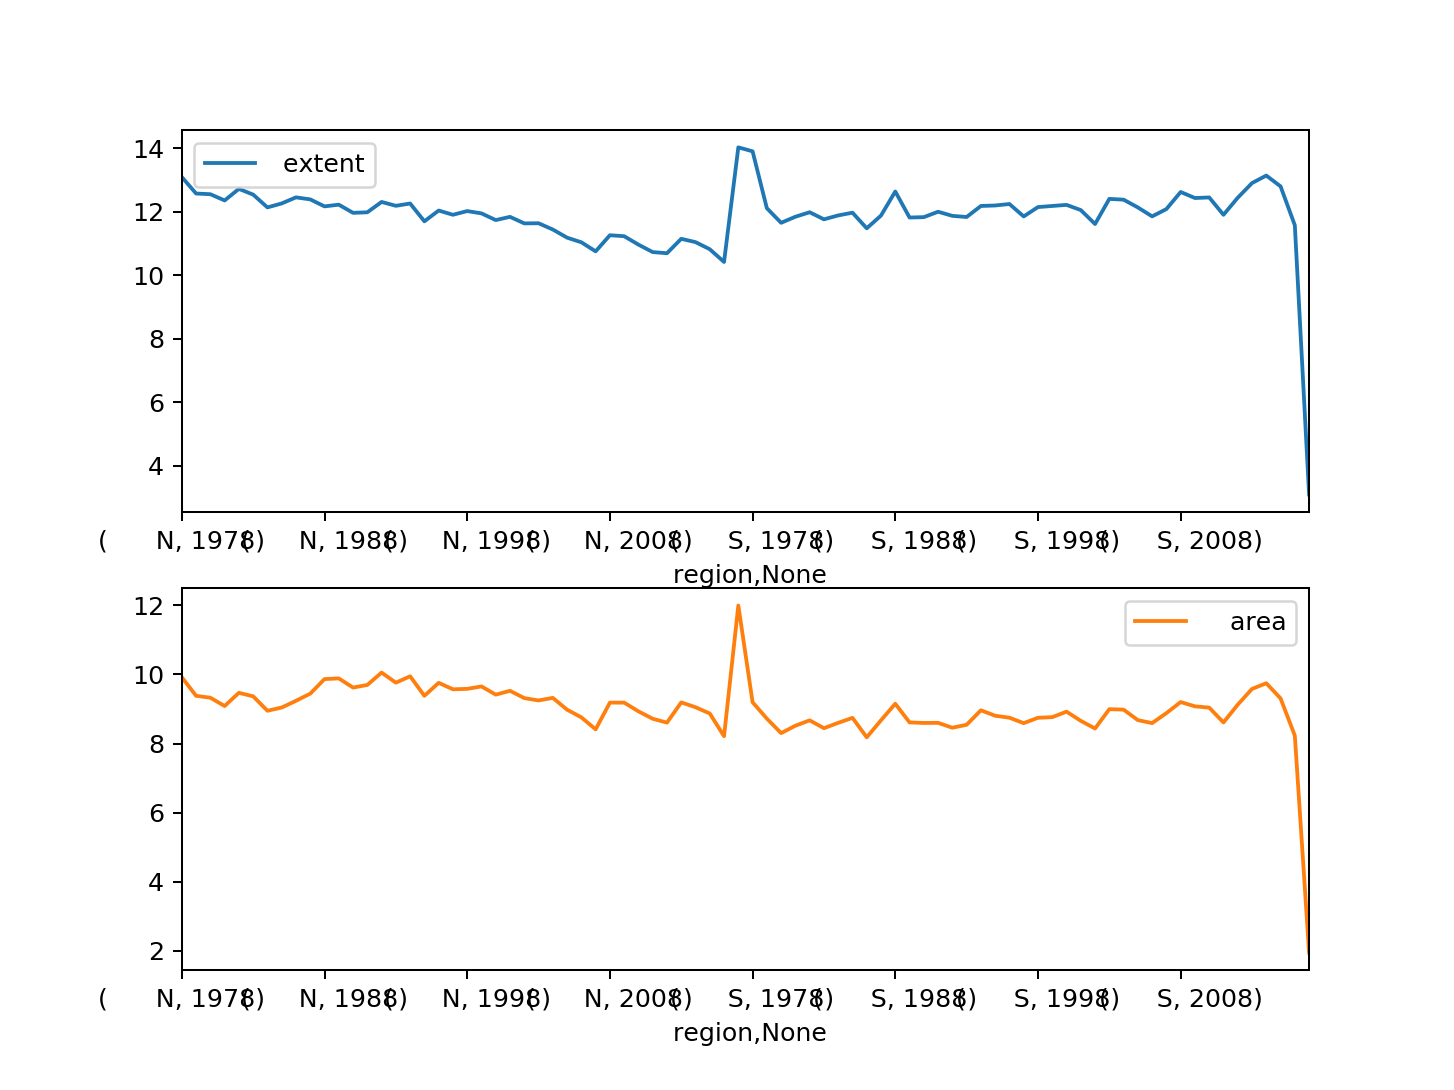

c:\users\danielmateuspires\coding\icy-polar-opposites\venv\lib\site-packages\pandas\tools\plotting.py:2470: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000200E71302B0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000200E7F31940>], dtype=object)

In [146]:
fig, ax = plot.subplots(figsize=(8,6))
group_region_year_sorted.plot(ax=ax, subplots=True)

In [135]:
concatenated_df.head().to_json(orient = 'records')

'[{"    data_type":"      Goddard"," region":"      N"," extent":15.6,"   area":12.36},{"    data_type":"      Goddard"," region":"      N"," extent":15.05,"   area":11.88},{"    data_type":"      Goddard"," region":"      N"," extent":15.11,"   area":11.85},{"    data_type":"      Goddard"," region":"      N"," extent":15.34,"   area":12.13},{"    data_type":"      Goddard"," region":"      N"," extent":15.16,"   area":11.94}]'